In [2]:
import sys
import os
import importlib
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.models.baseModels.resnet_regression import ResNetModel
importlib.reload(sys.modules['src.models.baseModels.resnet_regression'])

data_dir = '../datasets/artificial_data/'
dataset_name = 'ContSimpleNoisyImageGeneratorMoreSmallCircles'


resnet = ResNetModel(
    data_dir=f'{data_dir}{dataset_name}', 
    num_epochs=10,
    learning_rate=0.01,
    weight_decay=1e-4,
    early_stopping_tol=30,
    early_stopping_min_delta=30
)


resnet.load_data()
resnet.train()
resnet.evaluate()

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <E03EDA44-89AE-3115-9796-62BA9E0E2EDE> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <D2077E4D-18BC-34B9-8A9B-1EF634A0F416> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


Is cuda available:  False
Is mps available:  True
Epoch 1/10, Train Loss: 5.106160820064106e+16, Val Loss: 1.387993214210394e+17
Epoch 2/10, Train Loss: 2607153880.950504, Val Loss: 7088030680.872559
Epoch 3/10, Train Loss: 2439469.1585484557, Val Loss: 6751913.425816127
Epoch 4/10, Train Loss: 1453.9545922530324, Val Loss: 3999.942961556571
Epoch 5/10, Train Loss: 87.5821936757941, Val Loss: 214.3312715802874
Epoch 6/10, Train Loss: 427.3991675125925, Val Loss: 1132.3507080078125
Epoch 7/10, Train Loss: 72.09504378469367, Val Loss: 175.8177604675293
Epoch 8/10, Train Loss: 69.72923770703767, Val Loss: 164.4968321663993
Epoch 9/10, Train Loss: 64.65573361045436, Val Loss: 148.75602667672294
Epoch 10/10, Train Loss: 53.7321124829744, Val Loss: 127.9899422781808
Loss of the network on the test images: 30.791920253208705
R^2 score of the network on the test images: 0.224196195602417


Found 20 instances of Conv2d layers.
Max value in heatmap before ReLU is: tensor(0.0001, device='mps:0', grad_fn=<MaxBackward1>)


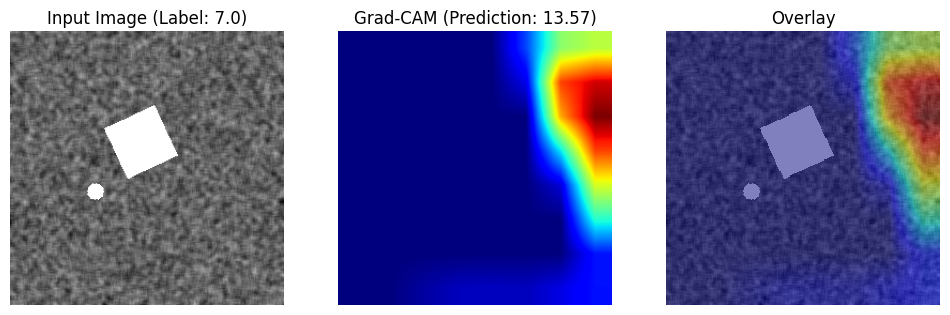

In [6]:
from src.XAI.GradCam import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam = GradCamResnet(resnet)
grad_cam.generateMultipleGradCam(1, save_output=True, save_dir='small_circle_only')

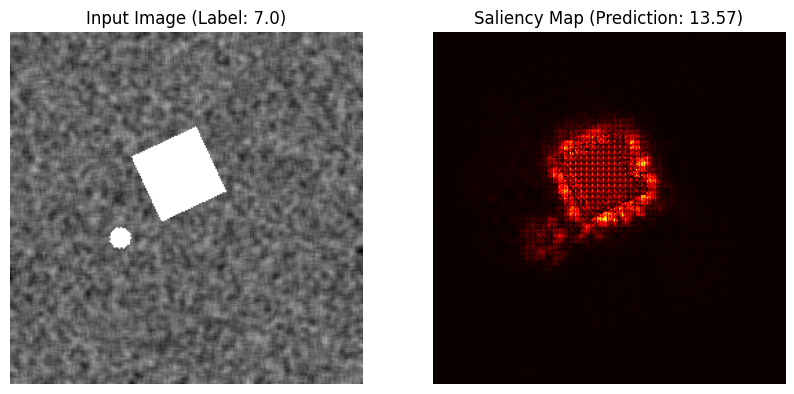

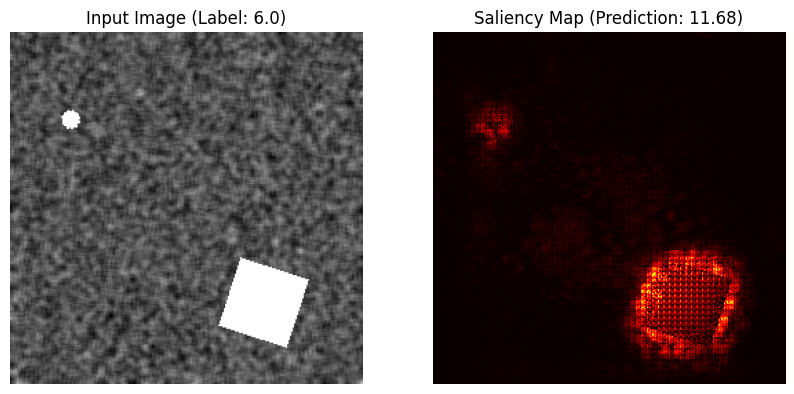

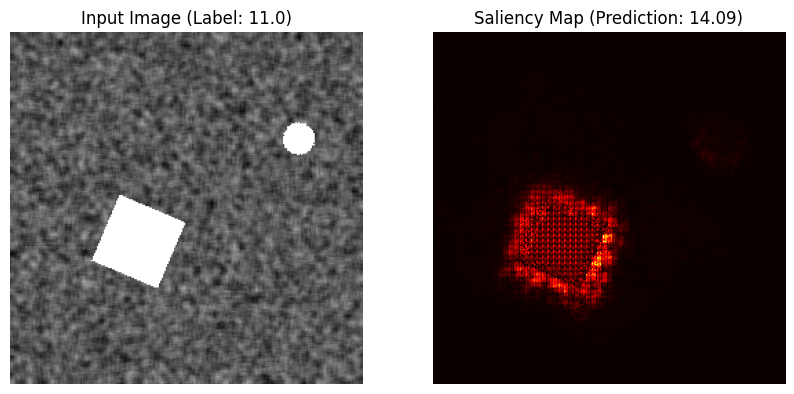

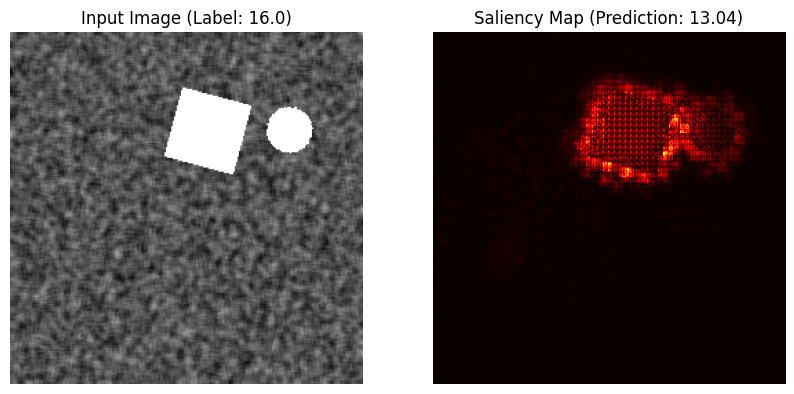

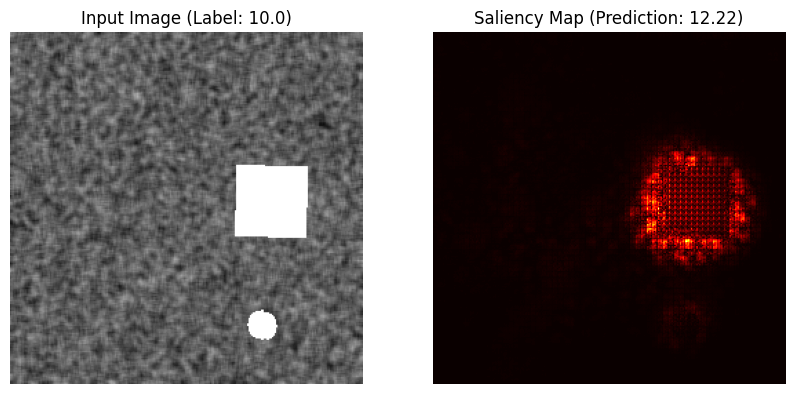

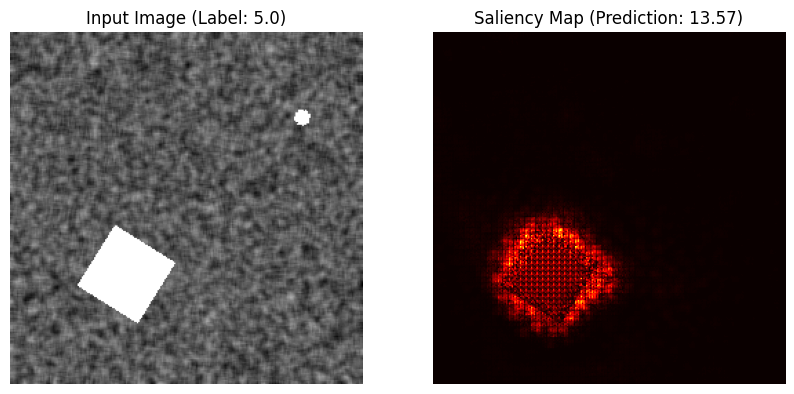

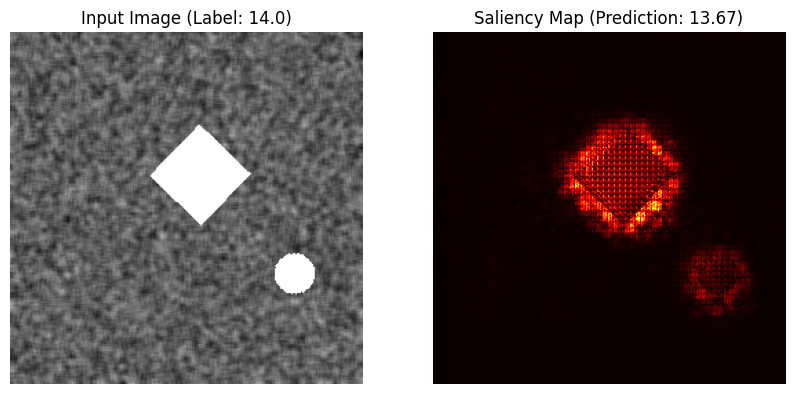

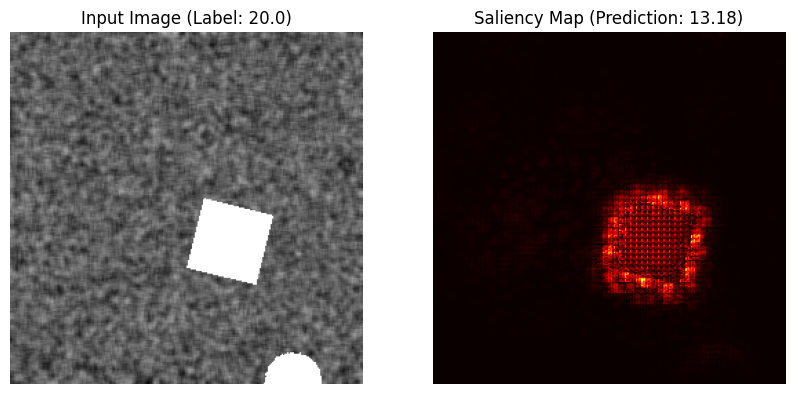

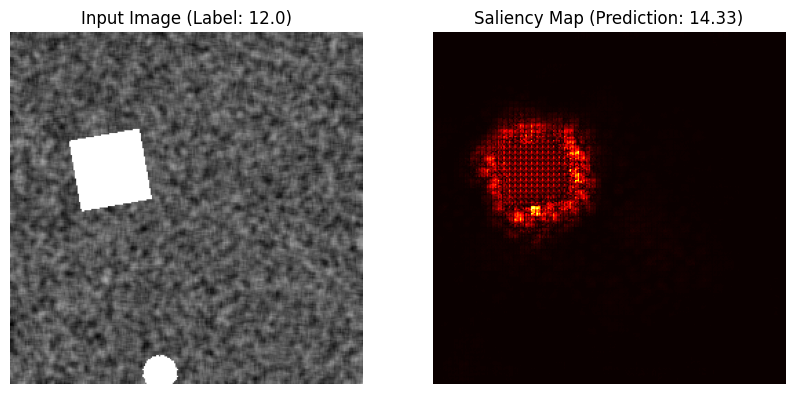

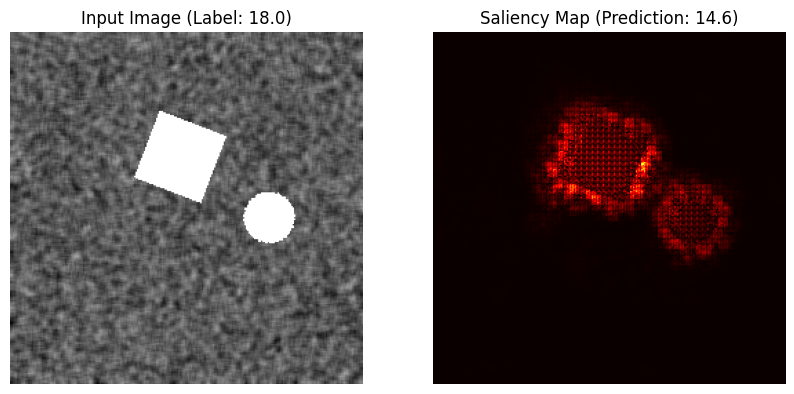

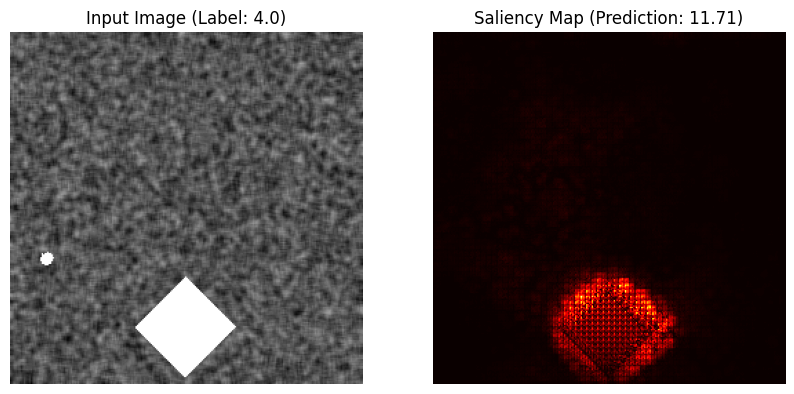

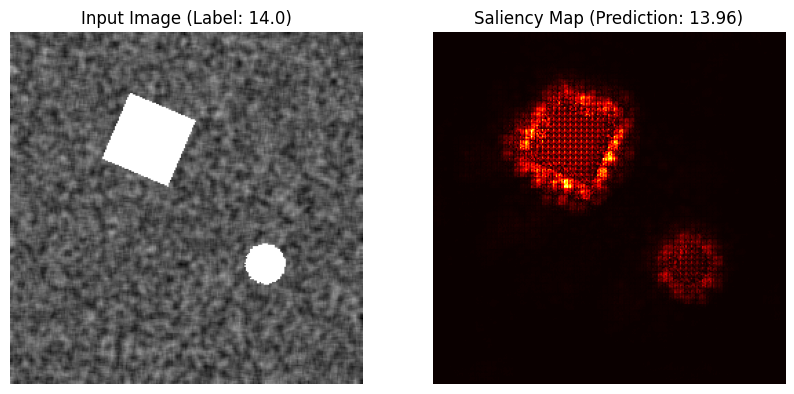

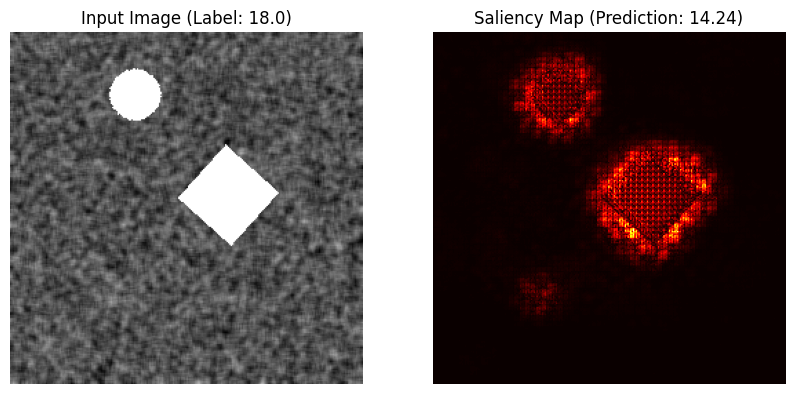

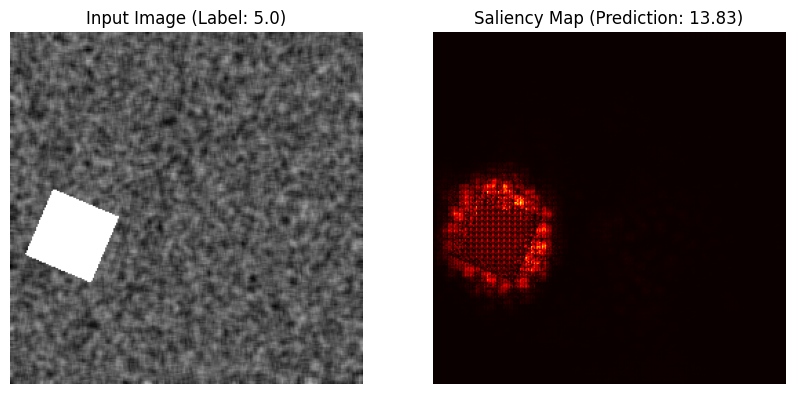

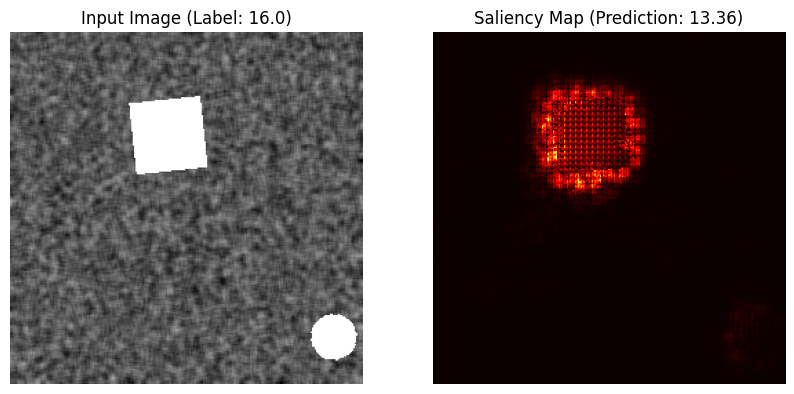

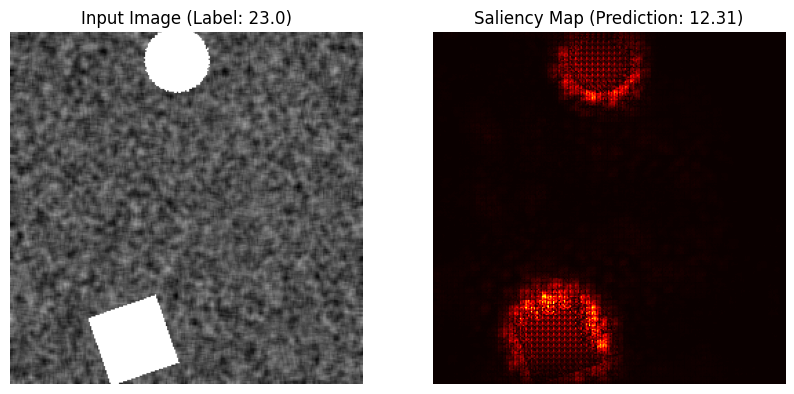

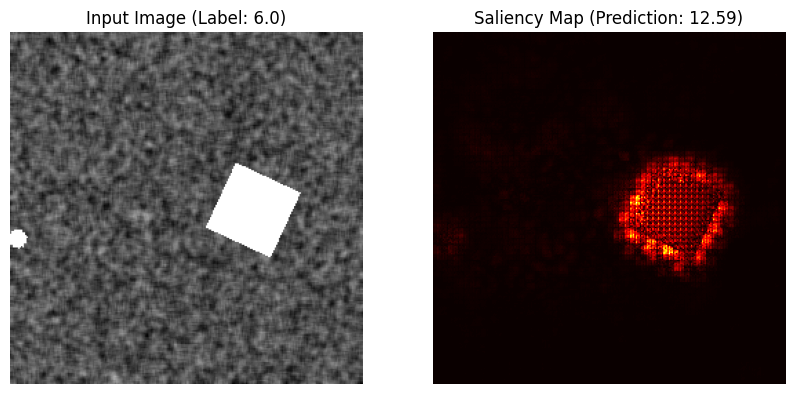

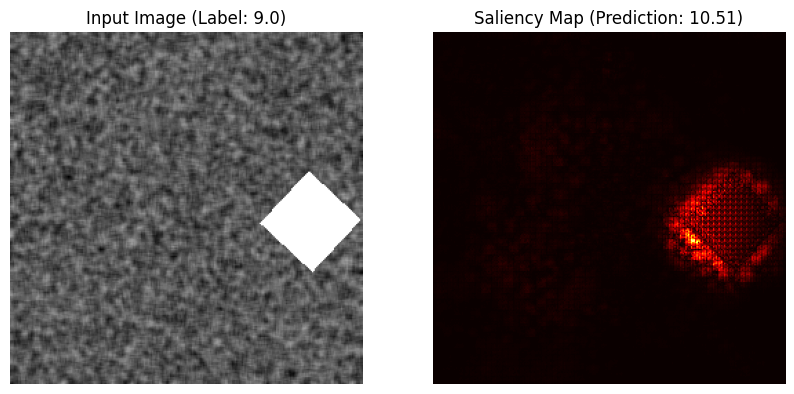

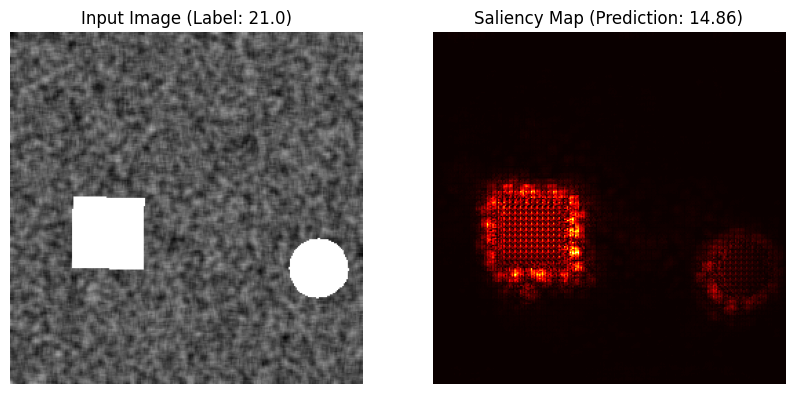

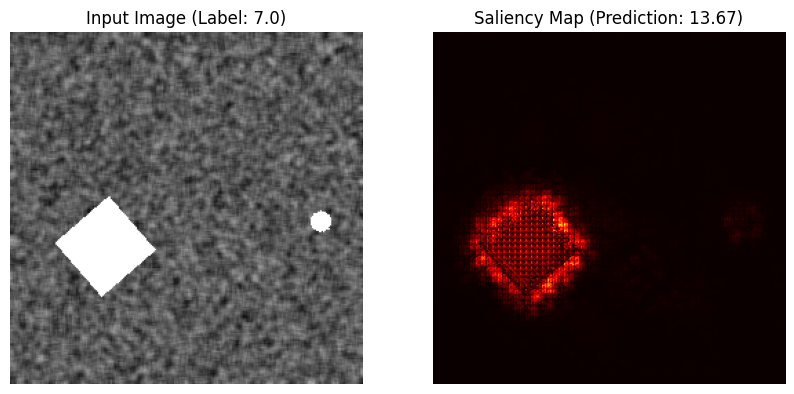

In [48]:
from src.XAI.VanillaSaliency import VanillaSaliency
importlib.reload(sys.modules['src.XAI.VanillaSaliency'])

# Assuming XAIResNet was already imported previously

# Initialize XAI instance
xai_resnet = VanillaSaliency(modelWrapper=resnet, device=resnet.device)
xai_resnet.get_saliency_maps(image_count=20)

Found 20 instances of Conv2d layers.
Max value in heatmap before ReLU is: tensor(0.0001, device='mps:0', grad_fn=<MaxBackward1>)


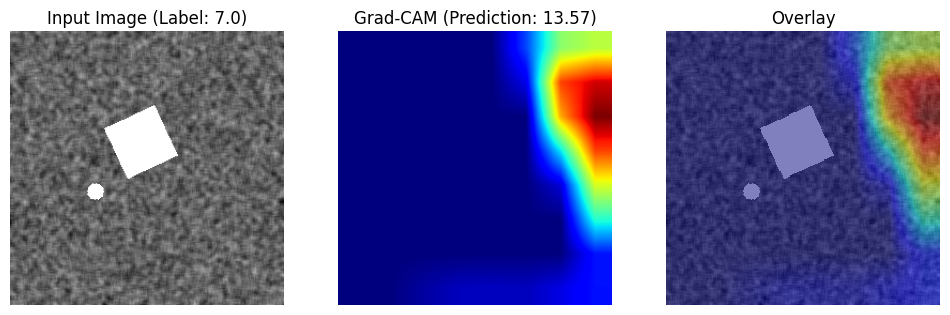

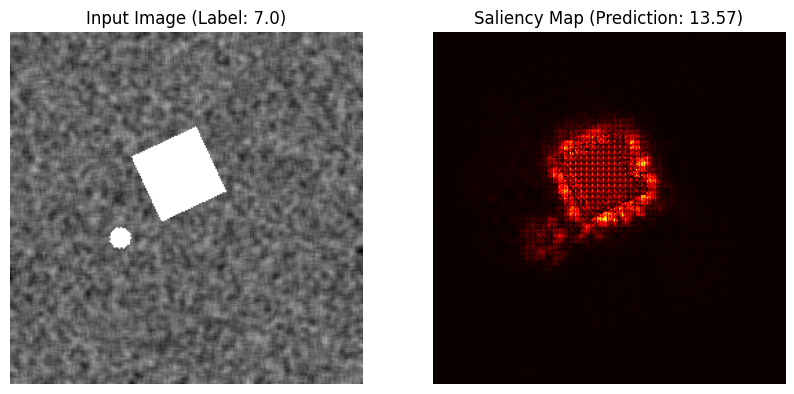

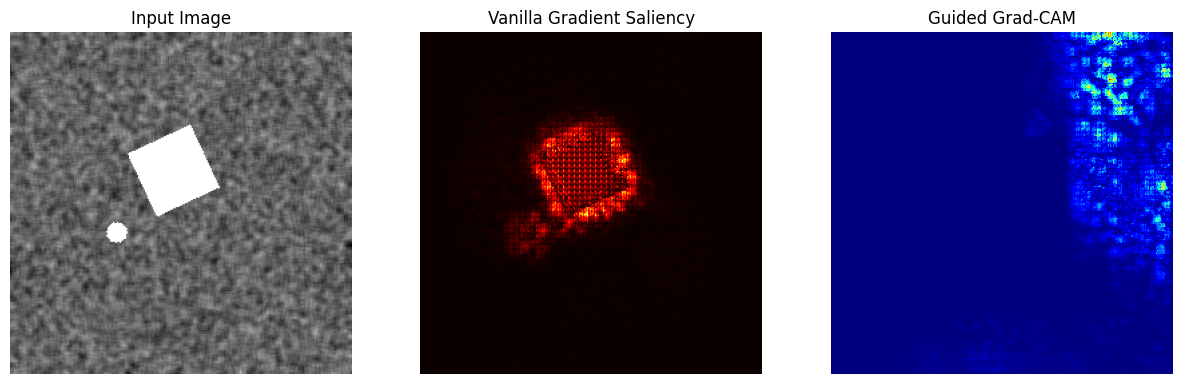

In [8]:
from src.XAI.GuideGradCam import GuidedGradCam
importlib.reload(sys.modules['src.XAI.GradCam'])
importlib.reload(sys.modules['src.XAI.VanillaSaliency'])
importlib.reload(sys.modules['src.XAI.GuideGradCam'])


# Assuming XAIResNet was alreFady imported previously

# Initialize XAI instance
guidedGradCam = GuidedGradCam(grad_cam=grad_cam, vanilla_saliency=xai_resnet)
for i in range(1):
    guidedGradCam.generate_guided_grad_cam(index=i)
# guidedGradCam.generate_guided_grad_cam(index=2)

Max value in heatmap before ReLU is: tensor(8.1955e-05, device='mps:0', grad_fn=<MaxBackward1>)


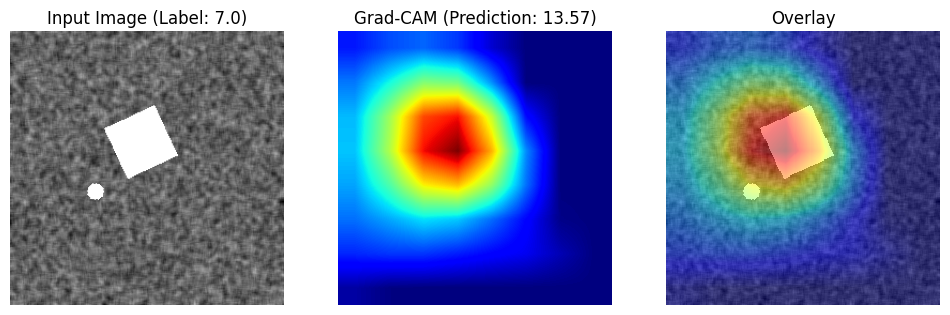

In [10]:
from src.XAI.ModifiedGradCam import ModifiedGradCam
importlib.reload(sys.modules['src.XAI.ModifiedGradCam'])
importlib.reload(sys.modules['src.XAI.utils.SaveFiles'])

grad_cam_mod = ModifiedGradCam(resnet)
for i in range(1):
    grad_cam_mod.generate_grad_cam(index=i)

In [46]:
from src.XAI.DeepShap import DeepShapResnet
importlib.reload(sys.modules['src.XAI.DeepShap'])

<module 'src.XAI.DeepShap' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/XAI/DeepShap.py'>

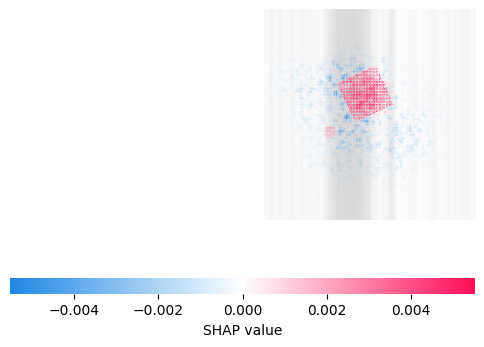

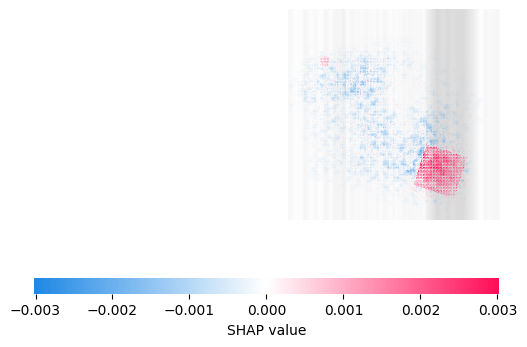

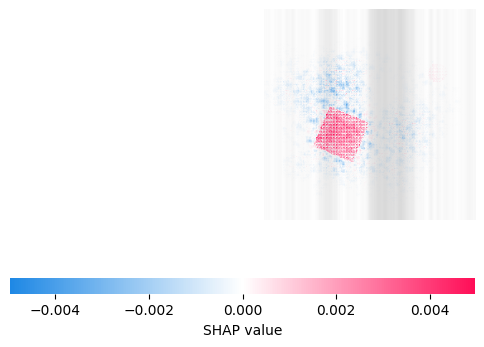

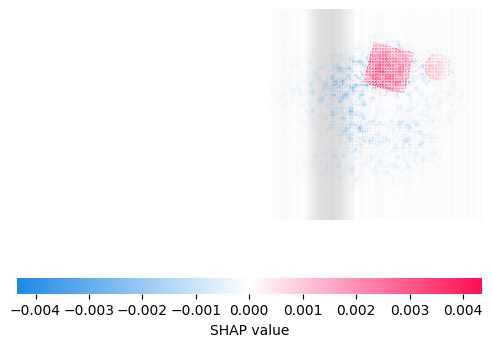

In [49]:
from src.XAI.DeepShap import DeepShapResnet
importlib.reload(sys.modules['src.XAI.DeepShap'])

deepShap = DeepShapResnet(resnet)
deepShap.generate_shap_values(4)
